## **Portfolio Optimization Strategy**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

### **1. Load Data**

The data include daily prices for 8 sub-asset classes, including four equities (US equity, EM equity, Asia equity, Europe equity), two fixed income (high yield bond, aggregate bond), one real estate (US real estate), one commodity (gold). We want to create a robust portfolio with proper weights allocated for each asset class.

In [2]:
data = pd.read_pickle('./data/asset_prices.pkl')
data

Gold Feb 23  SPDR Bloomberg High Yield Bond   \
Date                                                                      
1990-01-02 00:00:00-05:00          NaN                              NaN   
1990-01-03 00:00:00-05:00          NaN                              NaN   
1990-01-04 00:00:00-05:00          NaN                              NaN   
1990-01-05 00:00:00-05:00          NaN                              NaN   
1990-01-08 00:00:00-05:00          NaN                              NaN   
...                                ...                              ...   
2023-01-09 00:00:00-05:00  1872.699951                        92.839996   
2023-01-10 00:00:00-05:00  1871.599976                        92.720001   
2023-01-11 00:00:00-05:00  1874.599976                        93.379997   
2023-01-12 00:00:00-05:00  1895.500000                        93.879997   
2023-01-13 00:00:00-05:00  1918.400024                        93.959999   

                           Vanguard Real Estate ETF  \
Date                                                  
1990-01-02 00:00:00-05:00                       NaN   
1990-01-03 00:00:00-05:00                       NaN   
1990-01-04 00:00:00-05:00                       NaN   
1990-01-05 00:00:00-05:00                       NaN   
1990-01-08 00:00:00-05:00                       NaN   
...                                             ...   
2023-01-09 00:00:00-05:00                 84.400002   
2023-01-10 00:00:00-05:00                 84.589996   
2023-01-11 00:00:00-05:00                 87.620003   
2023-01-12 00:00:00-05:00                 88.730003   
2023-01-13 00:00:00-05:00                 88.180000   

                           Vanguard FTSEEuropean ETF  \
Date                                                   
1990-01-02 00:00:00-05:00                        NaN   
1990-01-03 00:00:00-05:00                        NaN   
1990-01-04 00:00:00-05:00                        NaN   
1990-01-05 00:00:00-05:00                        NaN   
1990-01-08 00:00:00-05:00                        NaN   
...                                              ...   
2023-01-09 00:00:00-05:00                  58.570000   
2023-01-10 00:00:00-05:00                  58.849998   
2023-01-11 00:00:00-05:00                  59.270000   
2023-01-12 00:00:00-05:00                  60.000000   
2023-01-13 00:00:00-05:00                  60.279999   

                           Vanguard FTSE Pacific ETF  \
Date                                                   
1990-01-02 00:00:00-05:00                        NaN   
1990-01-03 00:00:00-05:00                        NaN   
1990-01-04 00:00:00-05:00                        NaN   
1990-01-05 00:00:00-05:00                        NaN   
1990-01-08 00:00:00-05:00                        NaN   
...                                              ...   
2023-01-09 00:00:00-05:00                  65.900002   
2023-01-10 00:00:00-05:00                  65.720001   
2023-01-11 00:00:00-05:00                  66.250000   
2023-01-12 00:00:00-05:00                  67.480003   
2023-01-13 00:00:00-05:00                  67.769997   

                           iShares Core U.S. Aggregate Bon  \
Date                                                         
1990-01-02 00:00:00-05:00                              NaN   
1990-01-03 00:00:00-05:00                              NaN   
1990-01-04 00:00:00-05:00                              NaN   
1990-01-05 00:00:00-05:00                              NaN   
1990-01-08 00:00:00-05:00                              NaN   
...                                                    ...   
2023-01-09 00:00:00-05:00                        99.339996   
2023-01-10 00:00:00-05:00                        98.959999   
2023-01-11 00:00:00-05:00                        99.570000   
2023-01-12 00:00:00-05:00                       100.290001   
2023-01-13 00:00:00-05:00                        99.919998   

                           iShares MSCI Emerging Index Fun      S&P 50

In [3]:
data.columns

Index(['Gold Feb 23', 'SPDR Bloomberg High Yield Bond ',
       'Vanguard Real Estate ETF', 'Vanguard FTSEEuropean ETF',
       'Vanguard FTSE Pacific ETF', 'iShares Core U.S. Aggregate Bon',
       'iShares MSCI Emerging Index Fun', 'S&P 500'],
      dtype='object')

In [4]:
data.describe()

Gold Feb 23  SPDR Bloomberg High Yield Bond   Vanguard Real Estate ETF  \
count  5614.000000                      3805.000000               4606.000000   
mean   1072.299056                        73.438745                 52.770508   
std     512.015100                        17.353521                 22.687103   
min     255.100006                        30.508978                 12.025010   
25%     578.324997                        60.745571                 33.818842   
50%    1204.649963                        75.478043                 48.402428   
75%    1427.350006                        86.143661                 68.425060   
max    2051.500000                       102.753242                111.839035   

       Vanguard FTSEEuropean ETF  Vanguard FTSE Pacific ETF  \
count                4494.000000                4494.000000   
mean                   40.335834                  48.512343   
std                    10.452639                  12.977514   
min                    16.301462                  21.508989   
25%                    31.964365                  38.658637   
50%                    40.043547                  46.098026   
75%                    47.286429                  58.485435   
max                    67.176964                  81.422646   

       iShares Core U.S. Aggregate Bon  iShares MSCI Emerging Index Fun  \
count                      4858.000000                      4974.000000   
mean                         84.052267                        31.706331   
std                          17.123175                         9.784154   
min                          55.243813                         7.792619   
25%                          67.597692                        27.247338   
50%                          87.123955                        33.187523   
75%                          96.186008                        37.477737   
max                         114.005348                        55.536560   

           S&P 500  
count  8324.000000  
mean   1505.322375  
std    1000.270862  
min     295.459991  
25%     880.657516  
50%    1253.400024  
75%    1952.475037  
max    4796.560059

In [5]:
# check null values
data.isnull().sum()

Gold Feb 23                        2714
SPDR Bloomberg High Yield Bond     4523
Vanguard Real Estate ETF           3722
Vanguard FTSEEuropean ETF          3834
Vanguard FTSE Pacific ETF          3834
iShares Core U.S. Aggregate Bon    3470
iShares MSCI Emerging Index Fun    3354
S&P 500                               4
dtype: int64

### **1. Data Cleaning**

As rebalancing is usually done at week/quarter/month frequency, we upsample the data into weekly frequency.

In [6]:
# convert index to date format
data.index = pd.to_datetime(data.index)
data.index = pd.to_datetime(data.index.date) # get daily format
# convert freq to weekly
data = data.asfreq('w', method = 'ffill')
# convert price to return
asset_returns = data.pct_change()
# remove NA data
asset_returns = asset_returns.dropna(axis = 0)
# rename the fields
name_mapping = {'Gold Feb 23': 'Gold', 
                'Vanguard FTSE Pacific ETF':'Asia Equity',
               'SPDR Bloomberg High Yield Bond ':'High Yield', 
               'iShares MSCI Emerging Index Fun':'EM Equity',
               'iShares Core U.S. Aggregate Bon':'Agg Bond', 'S&P 500':'US Equity',
               'Vanguard FTSEEuropean ETF':'Eur Equity', 'Vanguard Real Estate ETF': 'Real Estate'}
asset_returns = asset_returns.rename(name_mapping, axis = 1)
asset_returns = asset_returns[['Asia Equity','Eur Equity','EM Equity','US Equity',
                 'Real Estate','Gold','High Yield','Agg Bond']]
asset_returns

Asia Equity  Eur Equity  EM Equity  US Equity  Real Estate  \
2007-12-16    -0.057921   -0.036785  -0.063301  -0.024398    -0.070594   
2007-12-23     0.002471    0.001046   0.025483   0.011247     0.009389   
2007-12-30     0.002660    0.019223   0.002352  -0.004022    -0.022450   
2008-01-06    -0.025341   -0.034784  -0.049037  -0.045222    -0.065781   
2008-01-13    -0.010035   -0.023842   0.015069  -0.007516     0.007024   
...                 ...         ...        ...        ...          ...   
2022-12-11    -0.008697   -0.015115  -0.013151  -0.033725    -0.020541   
2022-12-18    -0.012555   -0.020286  -0.015720  -0.020847    -0.020273   
2022-12-25     0.004762    0.008850  -0.000793  -0.001957    -0.002147   
2023-01-01    -0.003253   -0.003415   0.002646  -0.001384    -0.003142   
2023-01-08     0.020824    0.049784   0.057256   0.014476     0.022915   

                Gold  High Yield  Agg Bond  
2007-12-16 -0.001385    0.001673 -0.004759  
2007-12-23  0.023068    0.000836  0.003586  
2007-12-30  0.034500    0.006570  0.008075  
2008-01-06  0.027990   -0.016496  0.009788  
2008-01-13  0.038234   -0.011041  0.003721  
...              ...         ...       ...  
2022-12-11  0.001225   -0.007347 -0.005036  
2022-12-18 -0.004505   -0.000435  0.007954  
2022-12-25  0.003296   -0.003013 -0.013890  
2023-01-01  0.013252   -0.010772 -0.010003  
2023-01-08  0.024455    0.027111  0.021652  

[787 rows x 8 columns]

In [7]:
asset_cum_returns = (1 + asset_returns).cumprod()
asset_cum_returns

Asia Equity  Eur Equity  EM Equity  US Equity  Real Estate  \
2007-12-16     0.942079    0.963215   0.936699   0.975602     0.929406   
2007-12-23     0.944406    0.964223   0.960570   0.986575     0.938132   
2007-12-30     0.946918    0.982758   0.962829   0.982607     0.917071   
2008-01-06     0.922923    0.948574   0.915615   0.938172     0.856745   
2008-01-13     0.913661    0.925958   0.929412   0.931121     0.862762   
...                 ...         ...        ...        ...          ...   
2022-12-11     1.386986    1.296594   0.994351   2.614797     2.379494   
2022-12-18     1.369573    1.270292   0.978720   2.560286     2.331255   
2022-12-25     1.376095    1.281534   0.977944   2.555275     2.326249   
2023-01-01     1.371619    1.277157   0.980531   2.551739     2.318940   
2023-01-08     1.400181    1.340738   1.036672   2.588678     2.372077   

                Gold  High Yield  Agg Bond  
2007-12-16  0.998615    1.001673  0.995241  
2007-12-23  1.021651    1.002510  0.998810  
2007-12-30  1.056898    1.009096  1.006876  
2008-01-06  1.086480    0.992450  1.016731  
2008-01-13  1.128021    0.981493  1.020514  
...              ...         ...       ...  
2022-12-11  2.263469    1.860711  1.495458  
2022-12-18  2.253273    1.859901  1.507352  
2022-12-25  2.260700    1.854296  1.486415  
2023-01-01  2.290659    1.834322  1.471546  
2023-01-08  2.346677    1.884053  1.503408  

[787 rows x 8 columns]

In [8]:
asset_returns.isnull().sum()

Asia Equity    0
Eur Equity     0
EM Equity      0
US Equity      0
Real Estate    0
Gold           0
High Yield     0
Agg Bond       0
dtype: int64

<AxesSubplot:title={'center':'Cumulative Return'}>

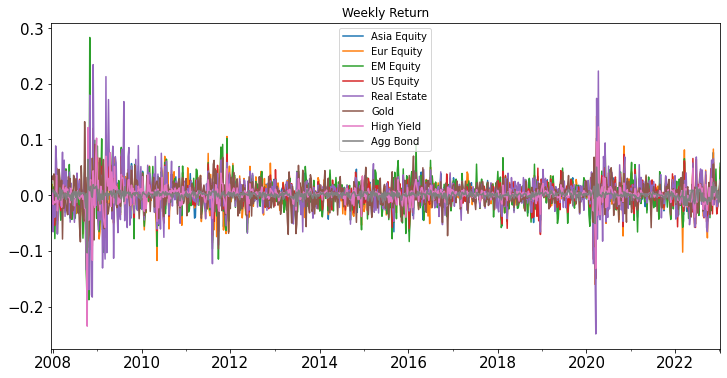

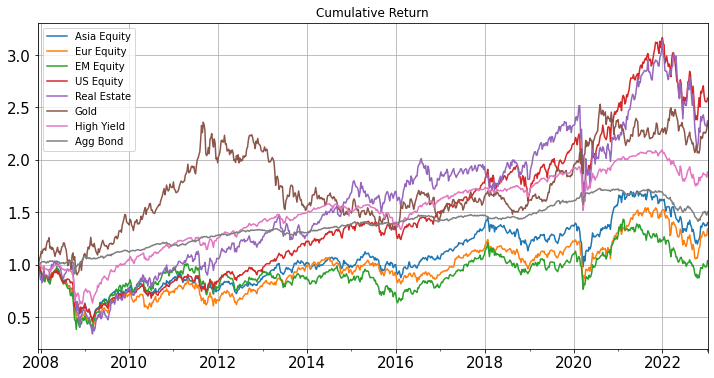

In [11]:
asset_cum_returns = (1 + asset_returns).cumprod()
# plot the returns
asset_returns.plot(figsize = (12, 6), title = 'Weekly Return')
asset_cum_returns.plot(figsize = (12, 6), title = 'Cumulative Return', grid=True)
# plt.savefig("./imgs/original_return.png",dpi=300)

### **2. Performance Evaluation**

In [12]:
asset_perf = pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown'])
# calculate performance
asset_perf['return'] = asset_cum_returns.iloc[-1] ** (1/(asset_cum_returns.shape[0]/52)) - 1
asset_perf['vol'] = asset_returns.std() * np.sqrt(52)
asset_perf['Sharpe'] = asset_perf['return']/asset_perf['vol']
asset_perf['Max Drawdown'] = -(1 - asset_cum_returns/asset_cum_returns.cummax()).max()
asset_perf

return       vol    Sharpe  Max Drawdown
Asia Equity  0.022490  0.185600  0.121173     -0.515013
Eur Equity   0.019563  0.229438  0.085265     -0.609026
EM Equity    0.002383  0.247778  0.009616     -0.612241
US Equity    0.064863  0.189977  0.341423     -0.539644
Real Estate  0.058732  0.277228  0.211856     -0.672700
Gold         0.057979  0.174700  0.331880     -0.436303
High Yield   0.042741  0.135536  0.315348     -0.383676
Agg Bond     0.027307  0.054570  0.500393     -0.181742

In [13]:
def calc_perf(returns, turnovers = None, plot_flag = False, figsize=(10,4)):
    
    ## remove NA data
    returns = returns.dropna(axis = 0)
    if isinstance(returns, pd.Series):
        if returns.name is None:
            returns.name = 'portfolio'      
        returns = returns.to_frame()
    
    ## Locate the inital starting point of the return data
    # defined as the first non-zero value
    starting_index = np.where(returns.sum(1) != 0)[0][0]
    starting_index = max(starting_index - 1, 0)
    returns = returns.iloc[starting_index:]
    
    ## Initiate the performance dataframe
    asset_perf = pd.DataFrame(0, dtype = float, 
                              index = returns.columns,
                              columns = ['return','vol','Sharpe','Max Drawdown', 'Turnovers'])

    ## Calculate performance
    cum_returns = (returns + 1).cumprod()
    asset_perf['return'] = cum_returns.iloc[-1] ** (1/(cum_returns.shape[0]/52)) - 1
    asset_perf['vol'] = returns.std() * np.sqrt(52)
    asset_perf['Sharpe'] = asset_perf['return']/asset_perf['vol']
    asset_perf['Max Drawdown'] = (1 - cum_returns/cum_returns.cummax()).max()
    
    ## Add turnover Rate
    if turnovers is not None:
        if isinstance(turnovers, pd.Series):
            if turnovers.name is None:
                turnovers.name = 'portfolio'   
            turnovers = turnovers.to_frame()
        turnovers = turnovers.loc[returns.index]
        asset_perf['Turnovers'] = turnovers.mean() * 52 # annual turnover
    
    ## Plot the charts
    if plot_flag:
        ax = cum_returns.plot(figsize = figsize)
        ax.set_title('Cumulative Return',  fontsize = 16)
        ax.tick_params(axis='x', labelsize = 12)
        ax.tick_params(axis='y', labelsize = 12)
        plt.legend(returns.columns + ' - Sharpe:' + asset_perf['Sharpe'].round(2).astype(str).values, fontsize = 12.5)

    return asset_perf

return     vol    Sharpe  Max Drawdown  Turnovers
Asia Equity  0.02249  0.1856  0.121173      0.515013        0.0

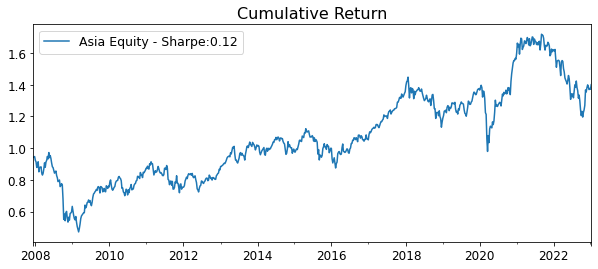

In [14]:
# generate performance of Asia Equity
calc_perf(asset_returns['Asia Equity'], plot_flag = True)

return       vol    Sharpe  Max Drawdown  Turnovers
Asia Equity  0.022490  0.185600  0.121173      0.515013        0.0
Eur Equity   0.019563  0.229438  0.085265      0.609026        0.0
EM Equity    0.002383  0.247778  0.009616      0.612241        0.0
US Equity    0.064863  0.189977  0.341423      0.539644        0.0
Real Estate  0.058732  0.277228  0.211856      0.672700        0.0
Gold         0.057979  0.174700  0.331880      0.436303        0.0
High Yield   0.042741  0.135536  0.315348      0.383676        0.0
Agg Bond     0.027307  0.054570  0.500393      0.181742        0.0

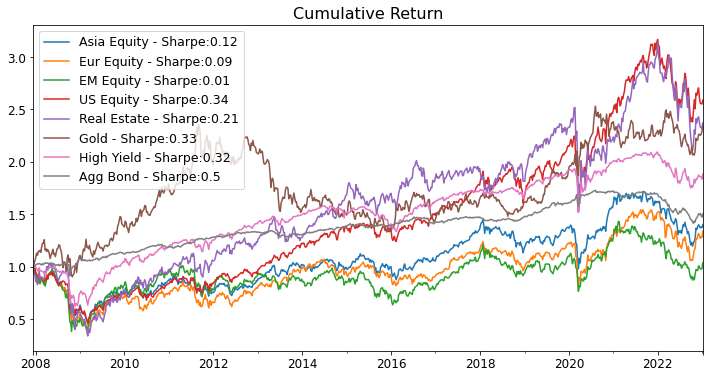

In [17]:
# generate performance of all asset classes
asset_perf = calc_perf(asset_returns,  plot_flag = True, figsize=(12,6))
asset_perf

### **3. Portfolio Rebalancing Algorithm**

- We use dynamic training window (07-17 train, 18 test; 07-18 train, 19 test....)
- This involves: 
  1. get initial portfolio with 07-17/12
  2. rebalance every week/month/quarter (usually rebalance every month, balancing the model update and high turnover)
- Since we are using weekly data, we will update the weights every week (as weights change with market dynamics) but will only rebalance positions on desired frequency

We first try a naive portfolio with 60% on equity and 40% on fixed income

In [18]:
# 60/40 portfolio
def calc_weight_60_40(asset_returns,  # return data
                      ind,            # date
                      prev_weights,   # pre-reb weights
                      args = {},      # additional arguments
                     ):  
    new_weights = {'Asia Equity':0.04, 
                   'Eur Equity':0.04,
                   'EM Equity':0.04,
                   'US Equity':0.48,
                   'Real Estate':0,
                   'Gold':0,
                   'High Yield':0.08,
                   'Agg Bond':0.32}
    return pd.Series(new_weights)

In [19]:
new_port = calc_weight_60_40(asset_returns = 1231241,
                  ind = 52152,          
                  prev_weights = 22,
                  args = {} 
                 )
new_port

Asia Equity    0.04
Eur Equity     0.04
EM Equity      0.04
US Equity      0.48
Real Estate    0.00
Gold           0.00
High Yield     0.08
Agg Bond       0.32
dtype: float64

### **3. BackTest Framework**

In [20]:
# backtest framework: we must iterate the whole dataframe since the weights update requires previous weight
# and it cannot be done in a vectorized way

def create_backtest(asset_returns = asset_returns, 
                    rebalance_freq = 'monthly', # monthly or weekly or quarterly
                    calc_target_weight = None,  # rebalance function
                    args = {},                  # additional arguments
                    starting_week = 0,          # the starting week of backtest
                    portfolio_name = 'portfolio'):
    
    start_time = time.time()
    
    # initiation
    temp_return = pd.Series(0, dtype = float, index = asset_returns.index, name = portfolio_name)
    temp_turnover = pd.Series(0, dtype = float, index = asset_returns.index, name = portfolio_name)
    temp_weights = pd.DataFrame(0, dtype = float, index = asset_returns.index, columns = asset_returns.columns)
     
    # starting backtgest
    print('Starting to Create Backtest...')

    last_ind = None   # date of last week
    
    for i, ind in enumerate(asset_returns.index):
        
        # move on to next date if i < starting_week
        if i < starting_week:
            last_ind = ind
            continue
        
        if last_ind is not None and ind.year != last_ind.year and ind.year % 2 == 0:
            print(('{:s}, Time Used: {:.2f} seconds, Current Cumulative Return: {:.2f}').format(
                ind.strftime('%Y'), (time.time() - start_time), temp_return.loc[:ind].sum()))
            
        # calcualte returns and drifted weights
        if i > starting_week:
            temp_return.loc[ind] = np.sum(temp_weights.loc[last_ind] * asset_returns.loc[ind])
            temp_weights.loc[ind] = temp_weights.loc[last_ind] * (
                1 + asset_returns.loc[ind])/(1 + np.sum(temp_weights.loc[last_ind] * asset_returns.loc[ind]))

        # check if rebalance is needed
        if i == starting_week or \
           (rebalance_freq == 'quarterly' and (i < asset_returns.shape[0] - 1) and (asset_returns.index[i + 1].quarter != ind.quarter)) or \
           (rebalance_freq == 'monthly' and (i < asset_returns.shape[0] - 1) and (asset_returns.index[i + 1].month != ind.month)) or \
           (rebalance_freq == 'weekly'):
      
            prev_weights = temp_weights.loc[ind].copy()
            # rebalance to new weights
            temp_weights.loc[ind] = calc_target_weight(asset_returns = asset_returns, 
                                                       ind = ind,
                                                       prev_weights = prev_weights, 
                                                       args = args)
            temp_turnover.loc[ind] = np.sum(np.abs(temp_weights.loc[ind] - prev_weights)) / 2 # one-way turnover
            
        last_ind = ind
        
    print('Finished! Total Time Used: {:.2f} seconds\n'.format(time.time() - start_time))
    
    return temp_return, temp_weights, temp_turnover

Test the framework with fixed portfolio weights

Starting to Create Backtest...
2008, Time Used: 0.01 seconds, Current Cumulative Return: 0.01
2010, Time Used: 0.12 seconds, Current Cumulative Return: -0.04
2012, Time Used: 0.22 seconds, Current Cumulative Return: 0.09
2014, Time Used: 0.32 seconds, Current Cumulative Return: 0.33
2016, Time Used: 0.41 seconds, Current Cumulative Return: 0.40
2018, Time Used: 0.50 seconds, Current Cumulative Return: 0.61
2020, Time Used: 0.60 seconds, Current Cumulative Return: 0.75
2022, Time Used: 0.70 seconds, Current Cumulative Return: 1.02
Finished! Total Time Used: 0.75 seconds



return       vol    Sharpe  Max Drawdown  Turnovers
portfolio  0.050931  0.125723  0.405107       0.37572    0.14166

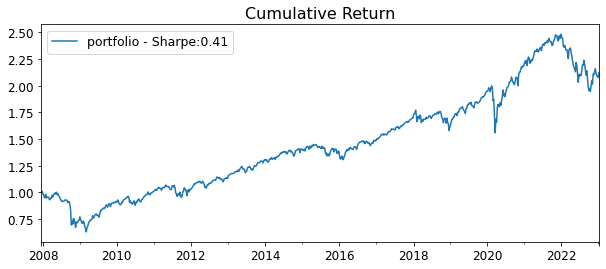

In [21]:
temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_weight_60_40,
    args = {},
    starting_week = 0)
calc_perf(temp_return,temp_turnover, plot_flag = True)

In [22]:
temp_weights

Asia Equity  Eur Equity  EM Equity  US Equity  Real Estate  Gold  \
2007-12-16     0.040000    0.040000   0.040000   0.480000          0.0   0.0   
2007-12-23     0.039790    0.039733   0.040703   0.481655          0.0   0.0   
2007-12-30     0.040000    0.040000   0.040000   0.480000          0.0   0.0   
2008-01-06     0.039956    0.039569   0.038984   0.469688          0.0   0.0   
2008-01-13     0.039711    0.038778   0.039728   0.468005          0.0   0.0   
...                 ...         ...        ...        ...          ...   ...   
2022-12-11     0.040389    0.040380   0.041562   0.471762          0.0   0.0   
2022-12-18     0.040255    0.039931   0.041291   0.466246          0.0   0.0   
2022-12-25     0.040000    0.040000   0.040000   0.480000          0.0   0.0   
2023-01-01     0.040066    0.040059   0.040303   0.481690          0.0   0.0   
2023-01-08     0.040053    0.041182   0.041728   0.478538          0.0   0.0   

            High Yield  Agg Bond  
2007-12-16    0.080000  0.320000  
2007-12-23    0.079449  0.318671  
2007-12-30    0.080000  0.320000  
2008-01-06    0.080637  0.331166  
2008-01-13    0.080062  0.333715  
...                ...       ...  
2022-12-11    0.080857  0.325051  
2022-12-18    0.081578  0.330700  
2022-12-25    0.080000  0.320000  
2023-01-01    0.079527  0.318355  
2023-01-08    0.079991  0.318509  

[787 rows x 8 columns]

<AxesSubplot:>

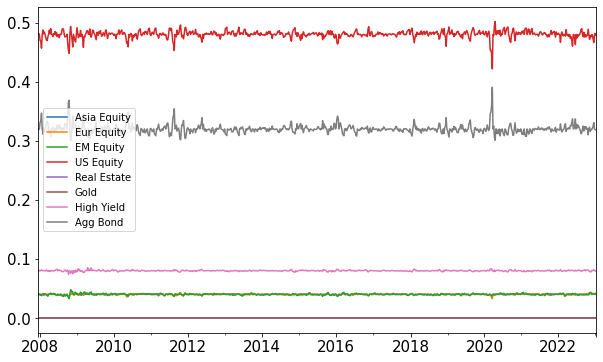

In [25]:
temp_weights.plot(figsize=(10,6), grid=False) 

We see the weights are almost stable but still with some fluctuations. This is due to the rebalance frequency is monthly, and asset prices change.

#### **3.1 V1: Standard Markowitz Model**

In [26]:
perf = pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown','Turnovers'])

In [27]:
def calc_MVO_weights(asset_returns,   # asset class return data
                     ind,             # date
                     prev_weights,    # pre-rebalance weights 
                     args = {
                             'lookback_window_min': 52 * 10,        # minimum # of weeks required to build the model
                             'opt': {},                             # parameter for the optimizer: lambda
                             }):
    
    input_return_data = asset_returns.loc[:ind]                     # latest asset return data up to ind
    if input_return_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                         # return if there is not enough data
    
    # prepare the input variables
    # r and sigma
    returns_temp = input_return_data.mean() * 52
    covs_temp = input_return_data.cov() * 52
    
    obj = lambda w, rp: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w)  # objective function 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]  # sum of weights = 1
    bounds = [(0, 1) for _ in prev_weights]               # upper and lower bound for each asset class

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] # equal weight
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0 # round the small weights
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

**A tiny point**: Markowitz model turns to converge to a extreme solution that concentrates the weights on a small fraction of asset classes while many other assets are only with a weight less than 1e-3. In real trading we cannot buy such a fractional amount and therefore we cut the weight towards zero, doing a sparse portfolio.

In [28]:
lookback_window_min = 52 * 10 # 10 years
rp = 10 # risk penalty parameter, usually 5-20

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'lookback_window_min': lookback_window_min, 
            'opt':(rp)},
    starting_week = 52 * 10)

Starting to Create Backtest...
2018, Time Used: 0.07 seconds, Current Cumulative Return: 0.00
2020, Time Used: 0.61 seconds, Current Cumulative Return: 0.11
2022, Time Used: 1.00 seconds, Current Cumulative Return: 0.22
Finished! Total Time Used: 1.18 seconds



      return       vol    Sharpe  Max Drawdown  Turnovers
V1  0.020013  0.071486  0.279963      0.169127   0.251873


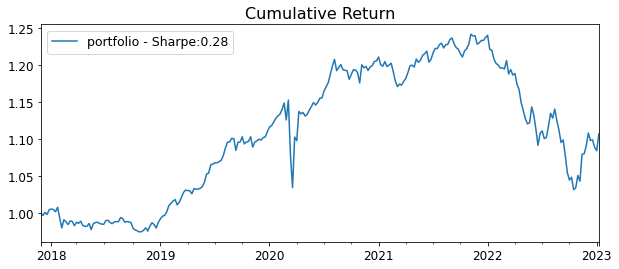

In [29]:
perf.loc['V1'] = calc_perf(temp_return, temp_turnover, plot_flag = True).iloc[0]
print(perf)


Some comments on the performance:
1. The one-way turnover is 25%, which is rather high.
2. The weight allocation for fixed-income is larger than 90% (to make the Sharpe ratio higher, since fixed income gives higher Sharpe with low volatility).

<AxesSubplot:>

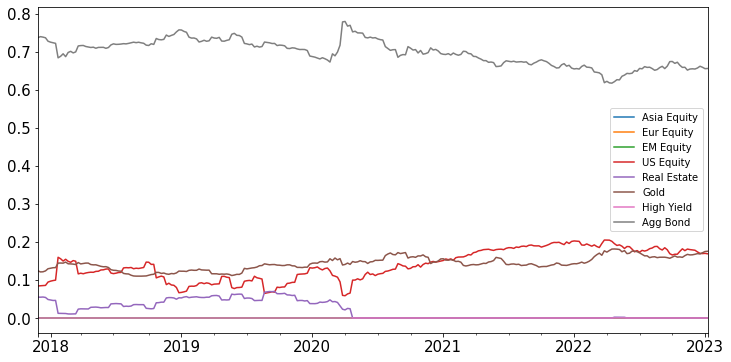

In [30]:
temp_weights.iloc[lookback_window_min:].plot(figsize = (12, 6))

Drawbacks of Markowitz model:
1. Parameters are extremely sensitive to input data. The low-order statistics (mean and var) are very sensitive to outliers.
2. It ignores higher order statistics and optimal portfolios are determined exclusively by mean and variance. 

Common improvements on Markowitz model:
1. Outlier detection and handling - making the the mean and variance estimates more stable.
2. Consider transaction costs + add more constraints to the weight allocation for specific asset classes. This helps to avoid the optimizer gives extreme solutions (such as 90% on equity).
3. Models that give better estimate on mu and sigma (such as Black Litterman).

#### **3.2 V1.5: Markowitz Model + Outlier Winsorization**

In [31]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0,                    # the % threshold of winsorization
                             'lookback_window_min': 52 * 10, 
                             'opt': {},
                             }):
    
    input_data = asset_returns.loc[:ind]                     # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                  # return if there is not enough data

    # percentile winsorization
    if args['winsor'] > 0:                                  
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
        
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    obj = lambda w, rp: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [(0, 1) for w in prev_weights]

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [32]:
lookback_window_min = 52 * 10
rp = 10
winsor = 0.01

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor': winsor,
            'lookback_window_min': lookback_window_min, 
            'opt':(rp)},
    starting_week = 52 * 10)

Starting to Create Backtest...
2018, Time Used: 0.06 seconds, Current Cumulative Return: 0.00
2020, Time Used: 0.70 seconds, Current Cumulative Return: 0.10
2022, Time Used: 1.30 seconds, Current Cumulative Return: 0.22
Finished! Total Time Used: 1.62 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.251873
V1.5  0.016359  0.073802  0.221653      0.177852   0.358170


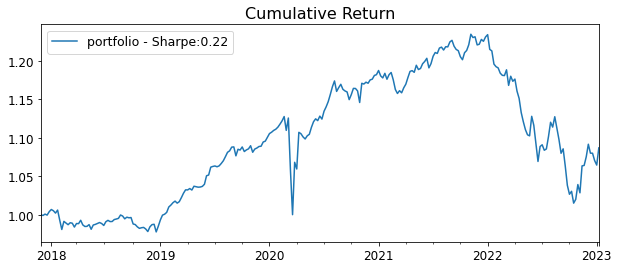

In [33]:
perf.loc['V1.5'] = calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

<AxesSubplot:>

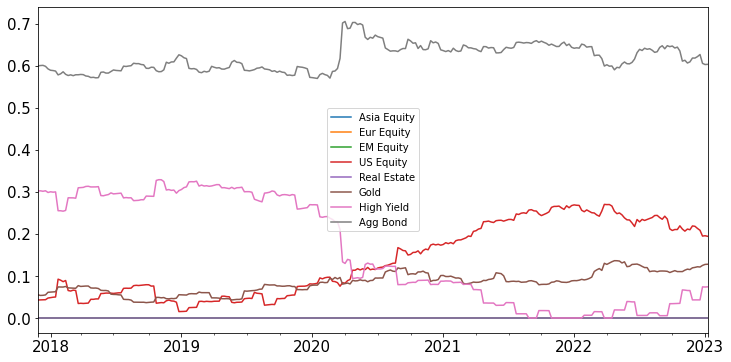

In [34]:
temp_weights.iloc[lookback_window_min:].plot(figsize = (12, 6))

Comments on the performance:
- If we check the Sharpe ratio, the model is worse. However winsorization is still considered very important for input data cleaning. 
- Now the weight allocation for fixed-income is a little bit lower.

#### **3.3 V2: Markowitz + Winsorization + Notional Control**

We want to add more constraints on the weights allocated to each asset class to avoid the optimizer giving an extreme corner solution.
We limit the weights allocated:
- Total equity: 50% - 70%
- Total fixed-income: 30% - 50%
- Gold: 0% - 20%
- Real estate: 0% - 20%
- Any single asset class < 40%, > 2%, diversification

In [35]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0,
                             'lookback_window_min': 52 * 10, 
                             'asset_min_max': (0, 1),        # upper and lower bound for each asset class
                             'notional_constraints': False,  # Flag for notional constraints
                             'notional_constraints_A':None,  # A in Aw - b >= 0
                             'notional_constraints_b':None,  # b in Aw - b >= 0
                             'opt': {},
                             }):
    
    input_data = asset_returns.loc[:ind]                     # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                  # return if there is not enough data
    
    if args['winsor'] > 0:
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
        
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    obj = lambda w, rp: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [args['asset_min_max'] for w in prev_weights]
    
    # add weights constraints
    if args['notional_constraints']:
        cons += [{'type':'ineq', 'fun': lambda w: args['notional_constraints_A'] @ w - args['notional_constraints_b']}]
    

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [36]:
# setup notional control
equity_index = np.where(asset_returns.columns.isin(['Asia Equity', 'Eur Equity', 'EM Equity', 'US Equity']))[0]
gold_index =  np.where(asset_returns.columns.isin(['Gold']))[0]
realestate_index =  np.where(asset_returns.columns.isin(['Real Estate']))[0]
fixedincome_index = np.where(asset_returns.columns.isin(['High Yield', 'Agg Bond']))[0]

## notional constraints
# A @ x - b >= 0 
notional_constraints = True
A = np.zeros([2 + 2 + 2 + 2, asset_returns.shape[1]])
A[0, equity_index] = 1        # min equity
A[1, equity_index] = -1       # max equity
A[2, fixedincome_index] = 1   # min fixed income
A[3, fixedincome_index] = -1  # max fixed income
A[4, gold_index] = 1          # min gold 
A[5, gold_index] = -1         # max gold 
A[6, realestate_index] = 1    # min real estate 
A[7, realestate_index] = -1   # max real estate  
b = np.array([0.5, -0.7,    # equity min and max
              0.3, -0.5,    # fixed income
              0,   -0.2,    # gold
              0,   -0.2])   # real estate

## allocation boundaries on each asset class
asset_min_max = (0.02, 0.4)

In [37]:
lookback_window_min = 52 * 10
rp = 10

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor': 0,
            'lookback_window_min': lookback_window_min, 
            'asset_min_max': asset_min_max,
            'notional_constraints': notional_constraints,
            'notional_constraints_A': A,
            'notional_constraints_b': b,
            'opt':(rp)},
    starting_week = 52 * 10)


Starting to Create Backtest...
2018, Time Used: 0.04 seconds, Current Cumulative Return: 0.01
2020, Time Used: 0.41 seconds, Current Cumulative Return: 0.15
2022, Time Used: 0.75 seconds, Current Cumulative Return: 0.40
Finished! Total Time Used: 0.92 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.251873
V1.5  0.016359  0.073802  0.221653      0.177852   0.358170
V2    0.047595  0.118363  0.402111      0.204417   0.246832


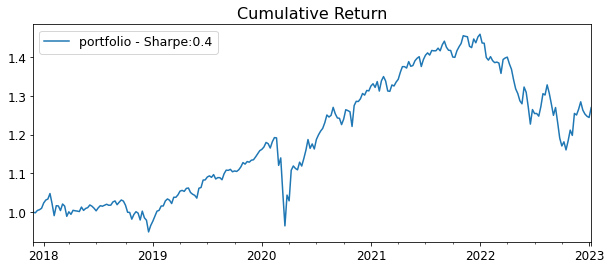

In [38]:
perf.loc['V2']= calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)

<AxesSubplot:>

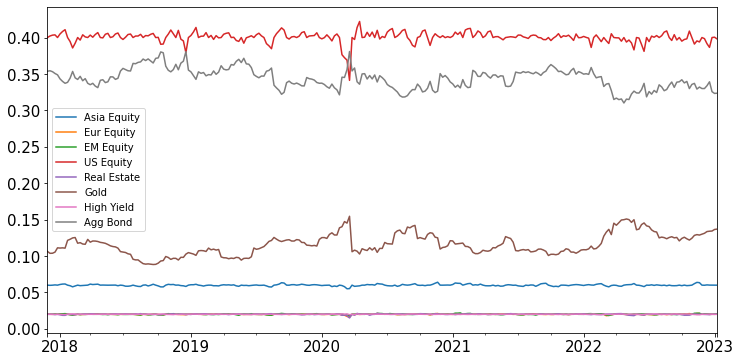

In [39]:
temp_weights.iloc[lookback_window_min:].plot(figsize = (12, 6))

We see that the Sharpe is much higher, and the turnover is lower the standard Markowitz. Most importantly, the weights all lie in our desired levels.

#### **3.4 V3: Markowitz + Winsorization + Notional Control + Turnover L2 Regularization**

在target function里面对turnover做一个l2 penalize

In [40]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0,
                             'lookback_window_min': 52 * 10, 
                             'asset_min_max': (0, 1),
                             'notional_constraints': False,
                             'notional_constraints_A':None,
                             'notional_constraints_b':None,
                             'opt': {},                      # parameters for optimizer: lambda and gamma
                             }):
    
    input_data = asset_returns.loc[:ind]                     # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:    # check if there is enough data points
        return prev_weights                                  # return if there is not enough data
    
    if args['winsor'] > 0:
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
    
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    if prev_weights.sum() > 0: # do not penalize turnover for initial portfolio construction
        # new objective function
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) + \
                    turnover_pan * np.sum(np.square(w - prev_weights.values)) # l2 penalize
    else:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [asset_min_max for w in prev_weights]
    
    if args['notional_constraints']:
        cons += [{'type':'ineq', 'fun': lambda w: args['notional_constraints_A'] @ w - args['notional_constraints_b']}]
    

    initial_guss = prev_weights.copy()
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)



In [41]:
lookback_window_min = 52 * 10
rp = 10
turnover_pan = 100 # hyperparameter

temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor': 0,
            'lookback_window_min': lookback_window_min, 
            'asset_min_max': asset_min_max,
            'notional_constraints': notional_constraints,
            'notional_constraints_A': A,
            'notional_constraints_b': b,
            'opt':(rp, turnover_pan)},
  starting_week = 52 * 10)


Starting to Create Backtest...
2018, Time Used: 0.05 seconds, Current Cumulative Return: 0.01
2020, Time Used: 0.84 seconds, Current Cumulative Return: 0.15


c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2022, Time Used: 1.57 seconds, Current Cumulative Return: 0.41
Finished! Total Time Used: 1.88 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.251873
V1.5  0.016359  0.073802  0.221653      0.177852   0.358170
V2    0.047595  0.118363  0.402111      0.204417   0.246832
V3    0.047987  0.121254  0.395755      0.211041   0.149951


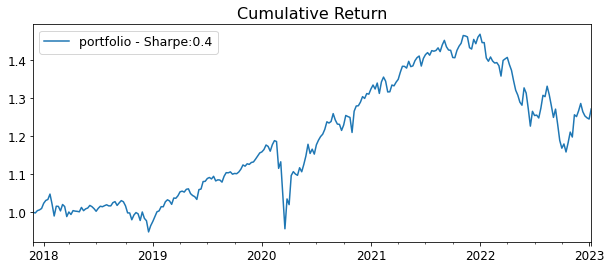

In [42]:
perf.loc['V3']= calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf) 

<AxesSubplot:>

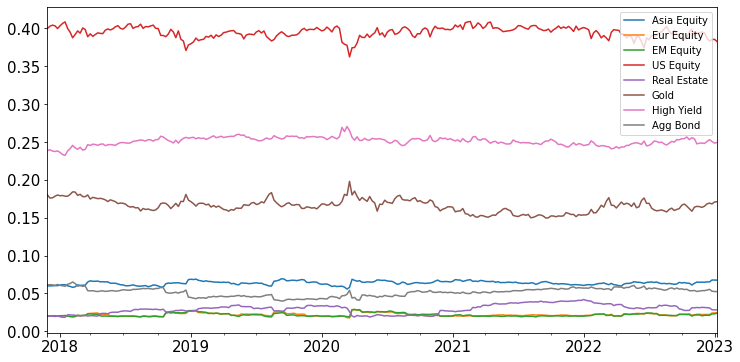

In [55]:
temp_weights.iloc[lookback_window_min:].plot(figsize = (12, 6))

V3 is better than V2, since the Sharpe ratio is roughly the same but the turnover is much lower!

#### **3.5 V4 (Final model): Markowitz + Winsorization + Notional Control + Turnover Control + Risk Control**

We want to finally improve the risk exposure. Instead of just trusting the variance as the variance contributor, we add risk control for each asset class:
- Risk contribution from equity: less than 70% in total
- Fixed-income: 0% - 20%
- Gold: 0% - 10%
- Real estate: 0% - 10%

In [56]:
rc_lookback_window = 52 * 10
def calc_risk_contribution(asset_cov, weights):
    temp_rc = weights * (asset_cov @ weights) / \
                 np.sqrt(weights.T @ asset_cov @ weights)  
    return temp_rc

def plot_stacked_area_chart(df, ax):
    import warnings
    warnings.filterwarnings('ignore')
    # split prc into negative only and positive only values
    df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
    # stacked area plot of positive values
    df_pos.plot.area(ax=ax, stacked=True, linewidth=0.)
    # reset the color cycle
    ax.set_prop_cycle(None)
    # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
    df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, linewidth=0.)
    # rescale the y axis
    ax.set_ylim([df_neg.sum(axis=1).min(), df_pos.sum(axis=1).max()])
    
    
def risk_contribution(asset_returns, portfolio_weights, plot_flag = False):
    rc = pd.DataFrame(dtype = float, index = asset_returns.index, columns = asset_returns.columns)
    prc = pd.DataFrame(dtype = float, index = asset_returns.index, columns = asset_returns.columns)
    for i in range(rc_lookback_window, asset_returns.shape[0]):
        input_return = asset_returns.iloc[:i + 1]
        input_cov = input_return.cov() * 52
        rc.iloc[i] = calc_risk_contribution(input_cov, portfolio_weights.iloc[i])
    prc = rc.div(rc.sum(1), axis = 0)
    if plot_flag:
        starting_index = np.where(rc.sum(1)!=0)[0][0] - 1
        starting_index = max(starting_index, 0)
        starting_index = rc.index[starting_index]
        fig, ax = plt.subplots(3, 2, figsize = (15, 15))
        plot_stacked_area_chart(portfolio_weights.loc[starting_index:], ax[0][0])
        ax[0][0].set_title('Asset Allocation',  fontsize = 16)
        ax[0][0].tick_params(axis='x', labelsize = 13)
        ax[0][0].tick_params(axis='y', labelsize = 13)
        
        plot_stacked_area_chart(rc.loc[starting_index:], ax[0][1])
        ax[0][1].set_title('Risk Contribution',  fontsize = 16)
        ax[0][1].tick_params(axis='x', labelsize = 13)
        ax[0][1].tick_params(axis='y', labelsize = 13)
        
        plot_stacked_area_chart(prc.loc[starting_index:], ax[1][0])
        ax[1][0].set_title('Risk Contribution (%)',  fontsize = 16)
        ax[1][0].tick_params(axis='x', labelsize = 13)
        ax[1][0].tick_params(axis='y', labelsize = 13)
        
        prc.loc[starting_index:].mean().plot(kind='bar', ax = ax[1][1])
        ax[1][1].set_title('Average Risk Contribution (%)',  fontsize = 16)
        ax[1][1].tick_params(axis='x', labelsize = 13)
        ax[1][1].tick_params(axis='y', labelsize = 13)

        chart_data = pd.DataFrame(index = prc.index, columns = ['Total Equity','Total Fixed Income'])
        chart_data['Total Equity'] = prc.iloc[:,equity_index].sum(1)
        chart_data['Total Fixed Income'] = prc.iloc[:,fixedincome_index].sum(1)
        chart_data.loc[starting_index:].plot(ax = ax[2][0])
        ax[2][0].set_title('Risk Contribution (%)',  fontsize = 16)
        ax[2][0].tick_params(axis='x', labelsize = 13)
        ax[2][0].tick_params(axis='y', labelsize = 13)
        ax[2][0].legend(fontsize = 13)
                  
        prc.iloc[:,[gold_index[0], realestate_index[0]]].loc[starting_index:].plot(ax = ax[2][1])
        ax[2][1].set_title('Risk Contribution (%)',  fontsize = 16)
        ax[2][1].tick_params(axis='x', labelsize = 13)
        ax[2][1].tick_params(axis='y', labelsize = 13)
        ax[2][1].legend(fontsize = 13)
        
        plt.tight_layout()
        plt.savefig("./imgs/risk_contribution.png", dpi=300)

    return rc, prc


First plot the risk contribution of the previous model

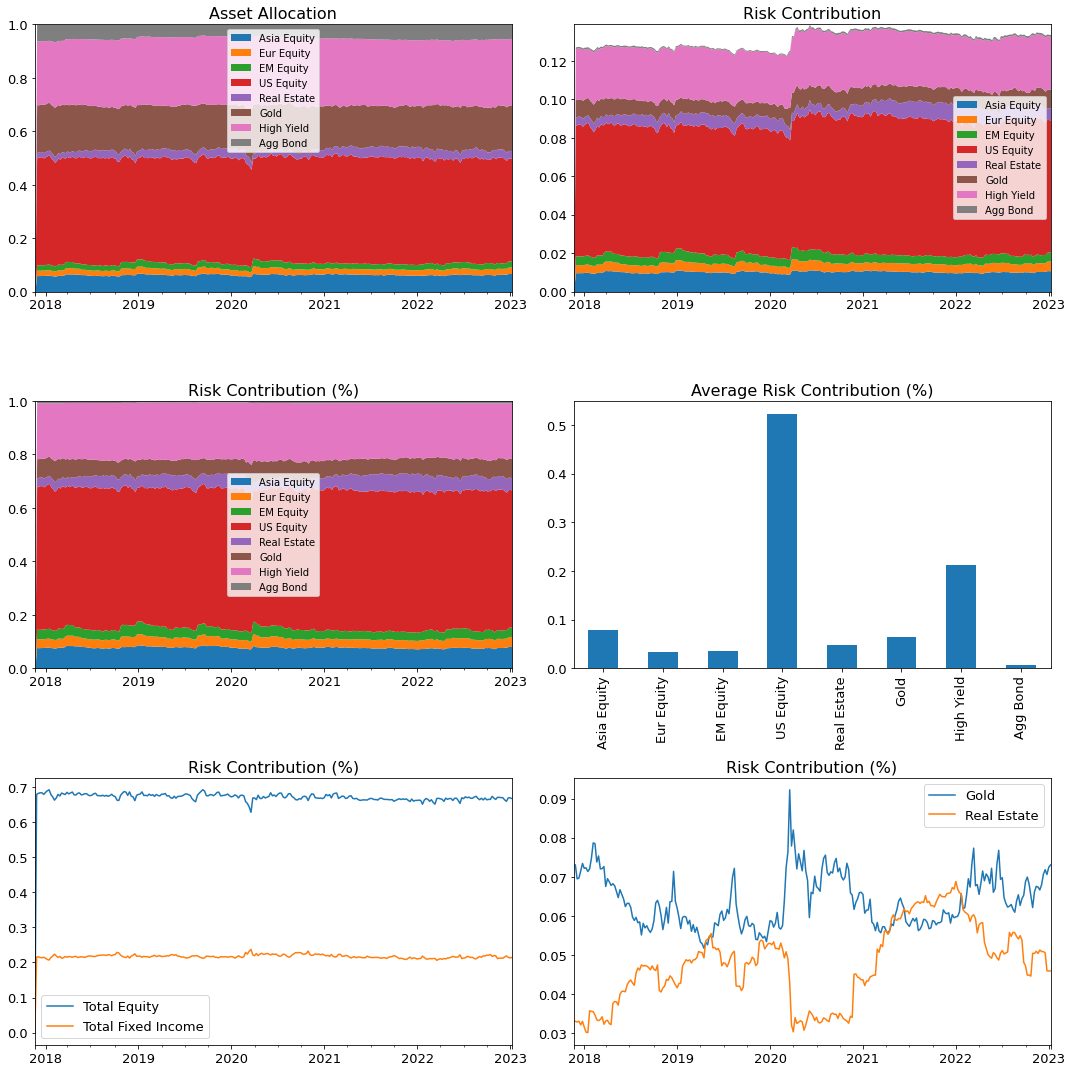

In [57]:
rc, prc = risk_contribution(asset_returns, temp_weights, plot_flag = True)

We can see the equity classes contribute more than 90% of the total risk.

In [58]:
def calc_MVO_weights(asset_returns,
                     ind,  
                     prev_weights,  
                     args = {'winsor': 0, 
                             'lookback_window_min': 52 * 10, 
                             'asset_min_max': (0, 1),
                             'notional_constraints': False,
                             'notional_constraints_A':None,
                             'notional_constraints_b':None,
                             'risk_constraints':False,
                             'risk_constraints_A':None,
                             'risk_constraints_b':None,
                             'opt':None}):
    
    input_data = asset_returns.loc[:ind]                        # latest return data up to ind
    if input_data.shape[0] < args['lookback_window_min']:       # check if there is enough data points
        return prev_weights                                     # return if there is not enough data

    if args['winsor'] > 0:
        input_data = input_data.clip(
            lower = input_data.quantile(args['winsor']), 
            upper = input_data.quantile(1 - args['winsor']),
            axis = 1)
        
    returns_temp = input_data.mean() * 52
    covs_temp = input_data.cov() * 52
    
    if prev_weights.sum() > 0:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) + \
                    turnover_pan * np.sum(np.square(w - prev_weights.values))
    else:
        obj = lambda w, rp, turnover_pan: -(w * returns_temp).sum() + 0.5 * rp * (w.T @ covs_temp @ w) 
    
    cons = [{'type':'eq', 'fun': lambda w: w.sum() - 1}]
    bounds = [asset_min_max for w in prev_weights]
    
    if args['notional_constraints'] == 1:
        cons += [{'type':'ineq', 'fun': lambda w: args['notional_constraints_A'] @ w - args['notional_constraints_b']}]
    
    if args['risk_constraints'] == 1: 
        RC = lambda w: args['risk_constraints_A'] @ ((w * (covs_temp @ w)) /(w.T @ covs_temp @ w)) \
                - args['risk_constraints_b']
        cons += [{'type':'ineq', 'fun': RC}]

    initial_guss = prev_weights.copy()
    
    if initial_guss.sum() == 0:
        initial_guss[:] = 1/initial_guss.shape[0] 
    
    res = minimize(
        obj,
        x0 = initial_guss,
        constraints = cons,
        bounds = bounds,
        tol = 1e-8,
        args = args['opt']
    )
    
    res.x[res.x < 1e-5] = 0
    res.x = res.x/np.sum(res.x)
    return pd.Series(res.x, index = prev_weights.index)

In [59]:
## risk constraints
# A @ f(w) - b >= 0 
risk_constraints = 1
risk_constraints_b = np.array([0,   -0.7,    # equity risk min and max
                               0,   -0.2,    # fixed income risk
                               0,   -0.1,    # gold risk
                               0,   -0.1])   # real estate risk


In [60]:
temp_return, temp_weights, temp_turnover = create_backtest(
    asset_returns = asset_returns, 
    rebalance_freq = 'monthly',
    calc_target_weight = calc_MVO_weights,
    args = {'winsor':winsor,
            'asset_min_max': asset_min_max,
            'notional_constraints': notional_constraints,
            'notional_constraints_A': A,
            'notional_constraints_b': b,
             'risk_constraints': risk_constraints,
             'risk_constraints_A': A,
             'risk_constraints_b': risk_constraints_b,
            'lookback_window_min': lookback_window_min, 
            'opt':(rp, turnover_pan)},
    starting_week = 52 * 10)

Starting to Create Backtest...
2018, Time Used: 0.08 seconds, Current Cumulative Return: 0.01
2020, Time Used: 1.59 seconds, Current Cumulative Return: 0.17
2022, Time Used: 3.02 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 3.82 seconds



        return       vol    Sharpe  Max Drawdown  Turnovers
V1    0.020013  0.071486  0.279963      0.169127   0.251873
V1.5  0.016359  0.073802  0.221653      0.177852   0.358170
V2    0.047595  0.118363  0.402111      0.204417   0.246832
V3    0.047987  0.121254  0.395755      0.211041   0.149951
V4    0.054281  0.141174  0.384500      0.238394   0.182858


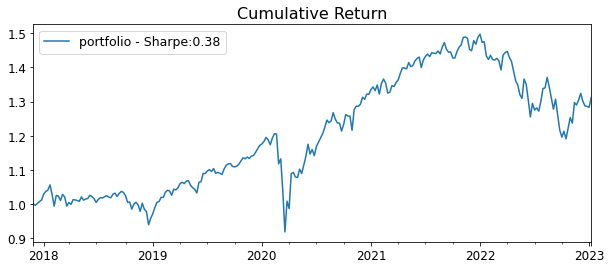

In [61]:
perf.loc['V4']= calc_perf(temp_return,temp_turnover, plot_flag = True).iloc[0]
print(perf)
# perf.to_markdown('./res/performance_summary.md', index=True)

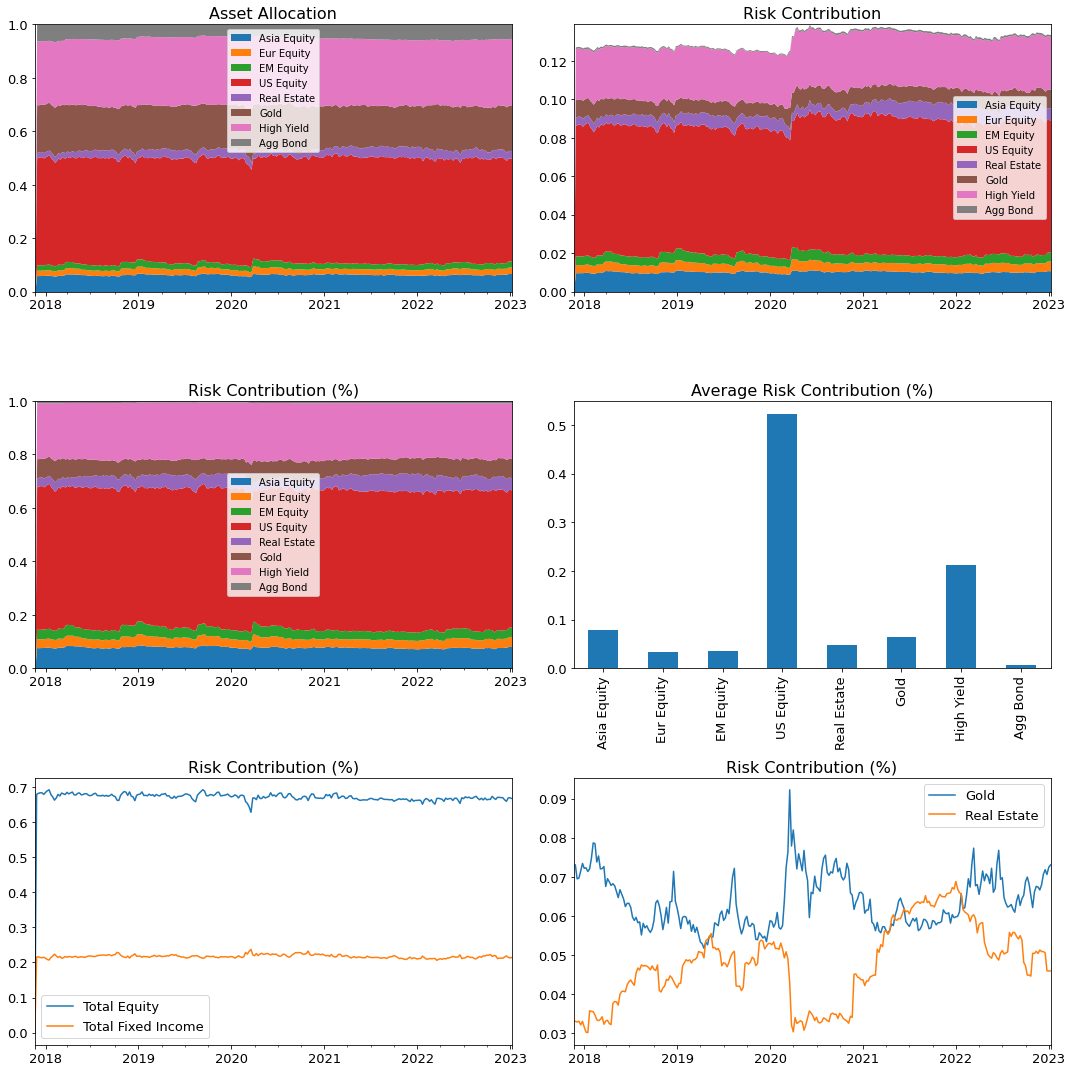

In [62]:
rc, prc = risk_contribution(asset_returns, temp_weights, plot_flag = True)

ValueError: 'sunset' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'


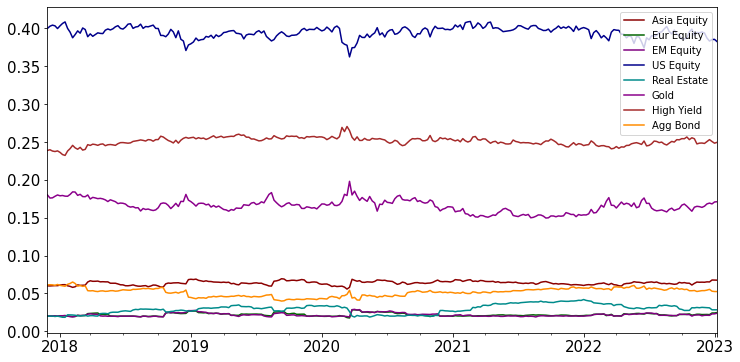

In [93]:
temp_weights.iloc[lookback_window_min:].plot(figsize = (12, 6), grid=False, 
                                             color=['darkred','darkgreen','purple','darkblue','darkcyan', 'darkmagenta', 'brown', 'darkorange'], linewidth=1.5)
# plt.savefig("./imgs/weights.png",dpi=300)

### **4. Robustness Test**

- check different asset classes
- check different value of hyper parameters (risk penalty parameter lambda, turnover limit parameter)
- check different backtest windows (minimum lookback window)

**Risk Penalty Parameter**

In [94]:
%%time

perf1 =  pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown','Turnovers'])

for rp in range(1, 20):
    temp_return, temp_weights, temp_turnover \
        = create_backtest(asset_returns = asset_returns, 
                        rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
                        calc_target_weight = calc_MVO_weights,
                        args = {'winsor':winsor,
                                'asset_min_max': asset_min_max,
                                'notional_constraints': notional_constraints,
                                'notional_constraints_A': A,
                                'notional_constraints_b': b,
                                'risk_constraints': risk_constraints,
                                'risk_constraints_A': A,
                                'risk_constraints_b': risk_constraints_b,
                                'lookback_window_min': lookback_window_min, 
                                'opt':(rp, turnover_pan)},
                        starting_week = 52 * 10)
    perf1.loc[rp] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]
    print(perf1.loc[rp])

Starting to Create Backtest...
2018, Time Used: 0.14 seconds, Current Cumulative Return: 0.01
2020, Time Used: 1.67 seconds, Current Cumulative Return: 0.16
2022, Time Used: 3.18 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 3.78 seconds

return          0.054424
vol             0.142982
Sharpe          0.380637
Max Drawdown    0.239179
Turnovers       0.159725
Name: 1, dtype: float64
Starting to Create Backtest...
2018, Time Used: 0.09 seconds, Current Cumulative Return: 0.01
2020, Time Used: 1.63 seconds, Current Cumulative Return: 0.16
2022, Time Used: 3.07 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 3.72 seconds

return          0.054473
vol             0.142879
Sharpe          0.381254
Max Drawdown    0.239057
Turnovers       0.160617
Name: 2, dtype: float64
Starting to Create Backtest...
2018, Time Used: 0.11 seconds, Current Cumulative Return: 0.01
2020, Time Used: 1.69 seconds, Current Cumulative Return: 0.16
2022, Time Used: 3.15 s

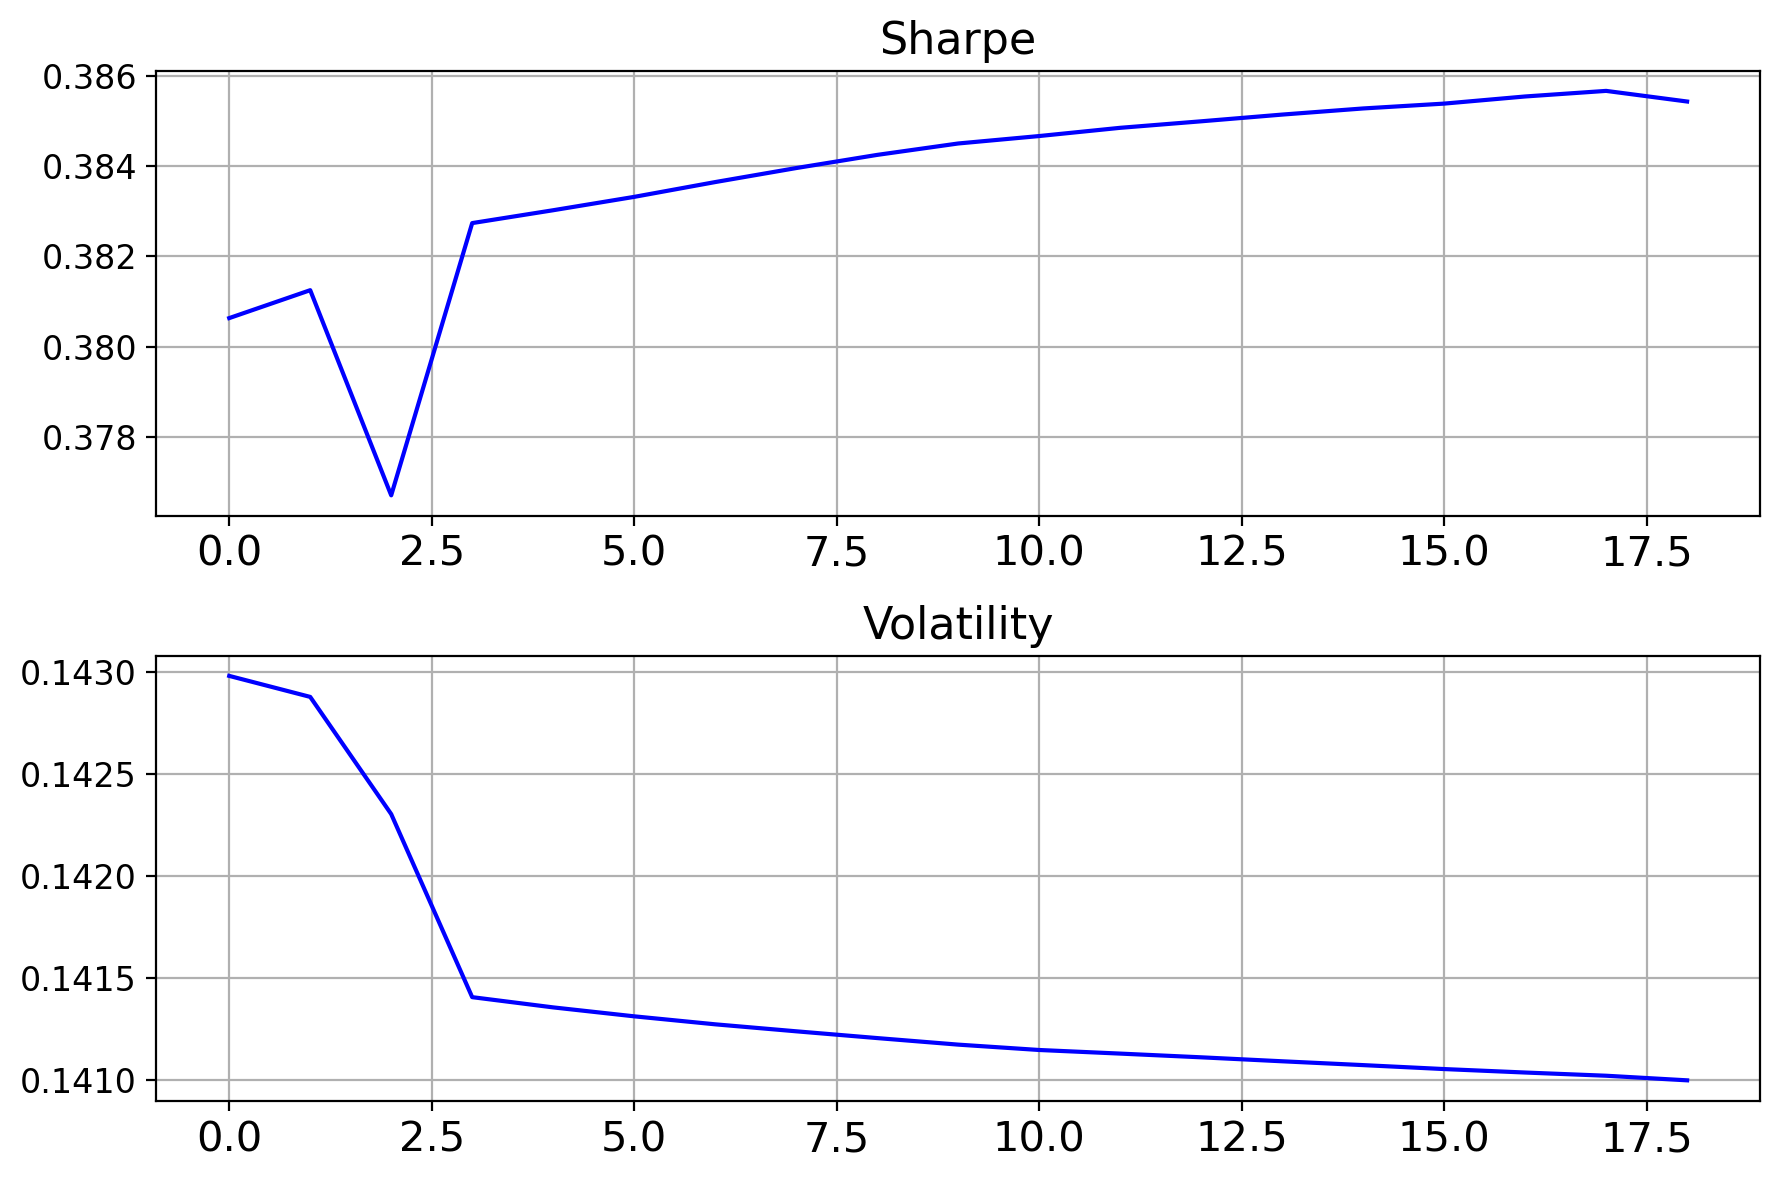

In [111]:
fig, ax = plt.subplots(2, 1, figsize = (9, 6), dpi = 200)
ax[0].plot(range(perf1.shape[0]), perf1['Sharpe'], color='blue')
# ax[0].set_ylim([0, 0.4])
ax[0].set_title('Sharpe',  fontsize = 16)
#ax[0].get_xaxis().set_ticks([])
ax[0].tick_params(axis='y', labelsize = 12)
ax[1].plot(range(perf1.shape[0]), perf1['vol'], color='blue')
ax[1].set_title('Volatility',  fontsize = 16)
#ax[1].get_xaxis().set_ticks([])
ax[1].tick_params(axis='y', labelsize = 12)
ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
# plt.savefig("./imgs/robust_risk.png", dpi=300)

It can be seen that risk penalty parameter does not affect Sharpe significantly. Hence, to lower down the volatility, we pick 5-15 as the penalty parameter.

**Turnover Penalty Parameter**

In [96]:
perf2 =  pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown','Turnovers'])

for turnover_pan in [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.7,] + list(range(1, 100, 5)):
    temp_return, temp_weights, temp_turnover \
        = create_backtest(asset_returns = asset_returns, 
                        rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
                        calc_target_weight = calc_MVO_weights,
                        args = {'winsor':winsor,
                                'asset_min_max': asset_min_max,
                                'notional_constraints': notional_constraints,
                                'notional_constraints_A': A,
                                'notional_constraints_b': b,
                                 'risk_constraints': risk_constraints,
                                 'risk_constraints_A': A,
                                 'risk_constraints_b': risk_constraints_b,
                                'lookback_window_min': lookback_window_min, 
                                'opt':(rp, turnover_pan)},
                         starting_week = 52)
    perf2.loc[turnover_pan] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]
    print(perf2.loc[turnover_pan])

Starting to Create Backtest...
2010, Time Used: 0.17 seconds, Current Cumulative Return: 0.00
2012, Time Used: 0.27 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.37 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.46 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.63 seconds, Current Cumulative Return: 0.01
2020, Time Used: 1.34 seconds, Current Cumulative Return: 0.17
2022, Time Used: 1.95 seconds, Current Cumulative Return: 0.44
Finished! Total Time Used: 2.30 seconds

return          0.055245
vol             0.139879
Sharpe          0.394946
Max Drawdown    0.236086
Turnovers       0.230595
Name: 0, dtype: float64
Starting to Create Backtest...
2010, Time Used: 0.04 seconds, Current Cumulative Return: 0.00
2012, Time Used: 0.12 seconds, Current Cumulative Return: 0.00
2014, Time Used: 0.21 seconds, Current Cumulative Return: 0.00
2016, Time Used: 0.29 seconds, Current Cumulative Return: 0.00
2018, Time Used: 0.45 seconds, Current Cumulative Retur

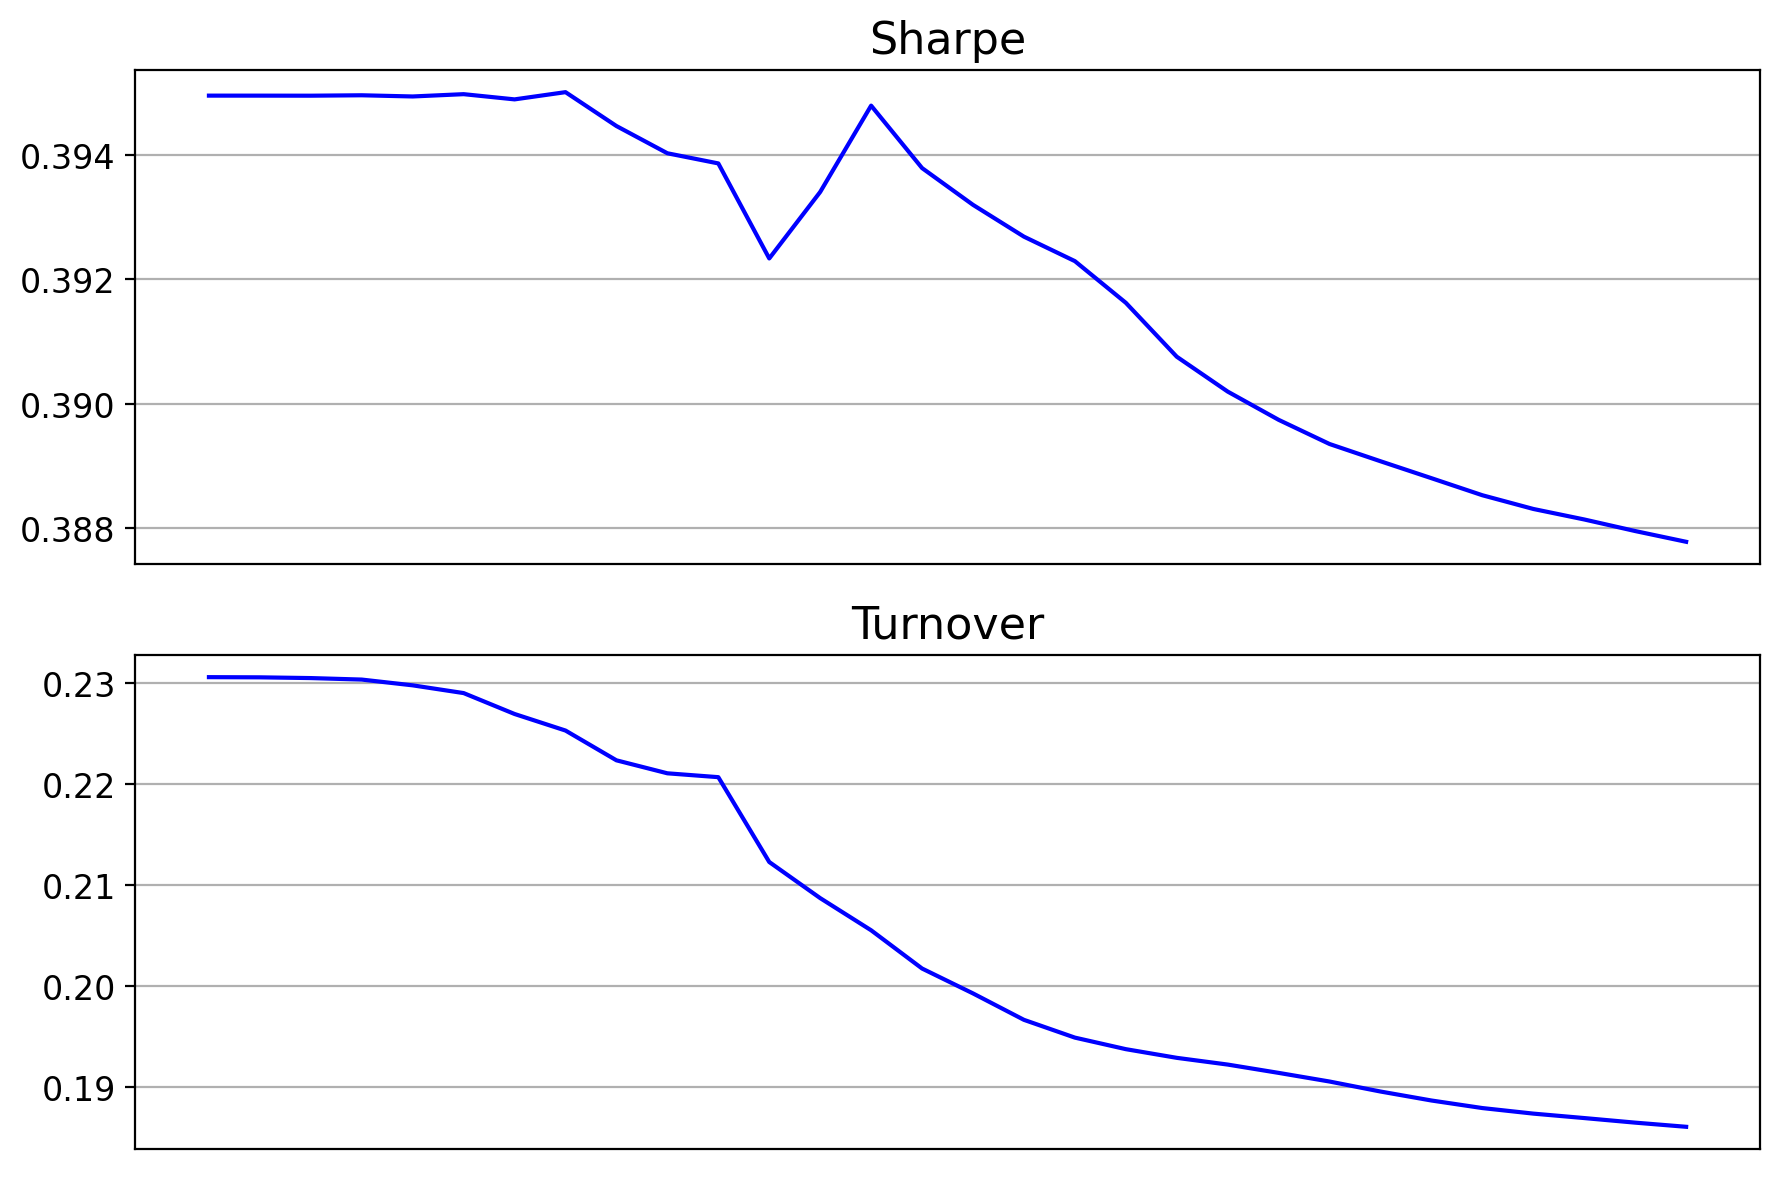

In [112]:
fig, ax = plt.subplots(2, 1, figsize = (9, 6), dpi = 200)
ax[0].plot(range(perf2.shape[0]), perf2['Sharpe'], color='blue')
ax[0].set_title('Sharpe',  fontsize = 16)
# ax[0].set_ylim([0, 0.4])
ax[0].get_xaxis().set_ticks([])
ax[0].tick_params(axis='y', labelsize = 12)
ax[1].plot(range(perf2.shape[0]), perf2['Turnovers'], color='blue')
ax[1].set_title('Turnover',  fontsize = 16)
ax[1].get_xaxis().set_ticks([])
ax[1].tick_params(axis='y', labelsize = 12)
ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
# plt.savefig("./imgs/robust_turnover.png", dpi=300)


Turnover penalty parameter does not affect Sharpe significantly. 

**Different backtesting window**

In [98]:
perf3 = pd.DataFrame(dtype = float, columns = ['60/40','mvo'])

for lookback_window_min in [52, 52*3, 52*5, 52*7, 52*10, 52*12]:
    temp_return, temp_weights, temp_turnover = create_backtest(
            asset_returns = asset_returns, 
            rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
            calc_target_weight = calc_weight_60_40, # rebalance algo
            starting_week = lookback_window_min)
    perf3.loc[lookback_window_min, '60/40'] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]['Sharpe']

    temp_return, temp_weights, temp_turnover \
        = create_backtest(asset_returns = asset_returns, 
                        rebalance_freq = 'monthly', #'monthly or weekly or quaterly'
                        calc_target_weight = calc_MVO_weights,
                        args = {'winsor':winsor,
                                'asset_min_max': asset_min_max,
                                'notional_constraints': notional_constraints,
                                'notional_constraints_A': A,
                                'notional_constraints_b': b,
                                 'risk_constraints': risk_constraints,
                                 'risk_constraints_A': A,
                                 'risk_constraints_b': risk_constraints_b,
                                'lookback_window_min': lookback_window_min, 
                                'opt':(rp, turnover_pan)},
                        starting_week = lookback_window_min)
    perf3.loc[lookback_window_min,'mvo'] = calc_perf(temp_return, temp_turnover, plot_flag = False).iloc[0]['Sharpe']
print(perf3)

Starting to Create Backtest...
2010, Time Used: 0.06 seconds, Current Cumulative Return: 0.25
2012, Time Used: 0.18 seconds, Current Cumulative Return: 0.38
2014, Time Used: 0.27 seconds, Current Cumulative Return: 0.62
2016, Time Used: 0.37 seconds, Current Cumulative Return: 0.69
2018, Time Used: 0.48 seconds, Current Cumulative Return: 0.90
2020, Time Used: 0.58 seconds, Current Cumulative Return: 1.04
2022, Time Used: 0.67 seconds, Current Cumulative Return: 1.31
Finished! Total Time Used: 0.72 seconds

Starting to Create Backtest...
2010, Time Used: 0.85 seconds, Current Cumulative Return: 0.32
2012, Time Used: 2.20 seconds, Current Cumulative Return: 0.50
2014, Time Used: 3.54 seconds, Current Cumulative Return: 0.69
2016, Time Used: 4.99 seconds, Current Cumulative Return: 0.71
2018, Time Used: 6.38 seconds, Current Cumulative Return: 0.94
2020, Time Used: 7.99 seconds, Current Cumulative Return: 1.08
2022, Time Used: 9.53 seconds, Current Cumulative Return: 1.34
Finished! Total

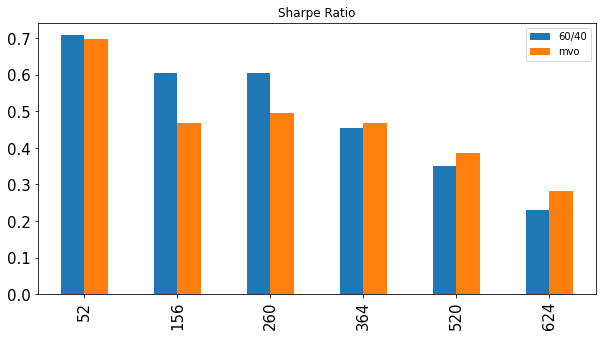

In [114]:
perf3.plot(kind = 'bar', figsize = (10, 5), title = 'Sharpe Ratio')
# plt.savefig("./imgs/robust_window.png", dpi=300)

### **5. Momentum Overlay on Equity Portfolio**

Indeed the backtesting framework for portfolio models can be used for backtesting general alpha strategy. Just need to denote the `rebalance frequency` and pass `calc_target_weight` parameter as a dataframe for positions.

We illustrate how to use the backtesting framework with a low-frequency momentum strategy.

In [176]:
equities = ['Asia Equity', 'Eur Equity', 'EM Equity', 'US Equity']
mom_signal_overlay = asset_returns.shift(4).rolling(48).sum() / \
        (asset_returns.shift(4).rolling(48).std() * np.sqrt(52))
mom_signal_overlay[mom_signal_overlay.columns[~mom_signal_overlay.columns.isin(equities)]] = np.nan
mom_signal_overlay


Asia Equity  Eur Equity  EM Equity  US Equity  Real Estate  Gold  \
2007-12-16          NaN         NaN        NaN        NaN          NaN   NaN   
2007-12-23          NaN         NaN        NaN        NaN          NaN   NaN   
2007-12-30          NaN         NaN        NaN        NaN          NaN   NaN   
2008-01-06          NaN         NaN        NaN        NaN          NaN   NaN   
2008-01-13          NaN         NaN        NaN        NaN          NaN   NaN   
...                 ...         ...        ...        ...          ...   ...   
2022-12-11    -0.801835   -0.474380  -1.092524  -0.585075          NaN   NaN   
2022-12-18    -0.795432   -0.433960  -0.996308  -0.534136          NaN   NaN   
2022-12-25    -0.733313   -0.470252  -1.088690  -0.567119          NaN   NaN   
2023-01-01    -0.651246   -0.430341  -0.850420  -0.555050          NaN   NaN   
2023-01-08    -0.675682   -0.499410  -0.915038  -0.614074          NaN   NaN   

            High Yield  Agg Bond  
2007-12-16         NaN       NaN  
2007-12-23         NaN       NaN  
2007-12-30         NaN       NaN  
2008-01-06         NaN       NaN  
2008-01-13         NaN       NaN  
...                ...       ...  
2022-12-11         NaN       NaN  
2022-12-18         NaN       NaN  
2022-12-25         NaN       NaN  
2023-01-01         NaN       NaN  
2023-01-08         NaN       NaN  

[787 rows x 8 columns]

In [177]:
mom_signal_overlay = mom_signal_overlay.rank(axis = 1, pct = 1, ascending = True)
mom_signal_overlay

Asia Equity  Eur Equity  EM Equity  US Equity  Real Estate  Gold  \
2007-12-16          NaN         NaN        NaN        NaN          NaN   NaN   
2007-12-23          NaN         NaN        NaN        NaN          NaN   NaN   
2007-12-30          NaN         NaN        NaN        NaN          NaN   NaN   
2008-01-06          NaN         NaN        NaN        NaN          NaN   NaN   
2008-01-13          NaN         NaN        NaN        NaN          NaN   NaN   
...                 ...         ...        ...        ...          ...   ...   
2022-12-11          0.5         1.0       0.25       0.75          NaN   NaN   
2022-12-18          0.5         1.0       0.25       0.75          NaN   NaN   
2022-12-25          0.5         1.0       0.25       0.75          NaN   NaN   
2023-01-01          0.5         1.0       0.25       0.75          NaN   NaN   
2023-01-08          0.5         1.0       0.25       0.75          NaN   NaN   

            High Yield  Agg Bond  
2007-12-16         NaN       NaN  
2007-12-23         NaN       NaN  
2007-12-30         NaN       NaN  
2008-01-06         NaN       NaN  
2008-01-13         NaN       NaN  
...                ...       ...  
2022-12-11         NaN       NaN  
2022-12-18         NaN       NaN  
2022-12-25         NaN       NaN  
2023-01-01         NaN       NaN  
2023-01-08         NaN       NaN  

[787 rows x 8 columns]

In [178]:
mom_positions = pd.DataFrame(0, index = mom_signal_overlay.index, columns = mom_signal_overlay.columns)
mom_positions[mom_signal_overlay > 0.5] = 1
mom_positions[mom_signal_overlay <= 0.5] = -1
mom_positions[mom_positions > 0] = mom_positions[mom_positions > 0].div(
    mom_positions[mom_positions > 0].sum(1), axis = 0)
mom_positions[mom_positions < 0] = -mom_positions[mom_positions < 0].div(
    mom_positions[mom_positions < 0].sum(1), axis = 0)
mom_positions

Asia Equity  Eur Equity  EM Equity  US Equity  Real Estate  Gold  \
2007-12-16          0.0         0.0        0.0        0.0            0     0   
2007-12-23          0.0         0.0        0.0        0.0            0     0   
2007-12-30          0.0         0.0        0.0        0.0            0     0   
2008-01-06          0.0         0.0        0.0        0.0            0     0   
2008-01-13          0.0         0.0        0.0        0.0            0     0   
...                 ...         ...        ...        ...          ...   ...   
2022-12-11         -0.5         0.5       -0.5        0.5            0     0   
2022-12-18         -0.5         0.5       -0.5        0.5            0     0   
2022-12-25         -0.5         0.5       -0.5        0.5            0     0   
2023-01-01         -0.5         0.5       -0.5        0.5            0     0   
2023-01-08         -0.5         0.5       -0.5        0.5            0     0   

            High Yield  Agg Bond  
2007-12-16           0         0  
2007-12-23           0         0  
2007-12-30           0         0  
2008-01-06           0         0  
2008-01-13           0         0  
...                ...       ...  
2022-12-11           0         0  
2022-12-18           0         0  
2022-12-25           0         0  
2023-01-01           0         0  
2023-01-08           0         0  

[787 rows x 8 columns]

Starting to Create Backtest...
2010, Time Used: 0.05 seconds, Current Cumulative Return: 0.21
2012, Time Used: 0.14 seconds, Current Cumulative Return: 0.14
2014, Time Used: 0.22 seconds, Current Cumulative Return: 0.26
2016, Time Used: 0.30 seconds, Current Cumulative Return: 0.30
2018, Time Used: 0.39 seconds, Current Cumulative Return: 0.33
2020, Time Used: 0.47 seconds, Current Cumulative Return: 0.44
2022, Time Used: 0.55 seconds, Current Cumulative Return: 0.51
Finished! Total Time Used: 0.59 seconds



return       vol   Sharpe  Max Drawdown  Turnovers
M  0.034065  0.088991  0.38279      0.141722    2.53919

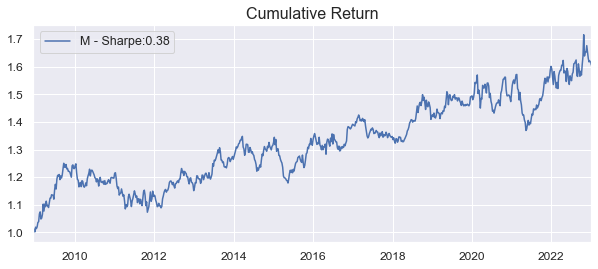

In [179]:
temp_return, temp_weights, temp_turnover  = create_backtest(
        asset_returns = asset_returns, 
        rebalance_freq = 'quarterly', #'monthly or weekly or quarterly'
        calc_target_weight = lambda asset_returns, ind, prev_weights, args: mom_positions.loc[ind], # rebalance algo
        starting_week = 52, portfolio_name = 'M')

calc_perf(temp_return, temp_turnover, plot_flag = True)